| Stretch/Untouched | ProbDistribution | Accuracy |
|        ---        |        ---       |    ---   |
| Stretched         |     Gaussian     |    .843  |

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

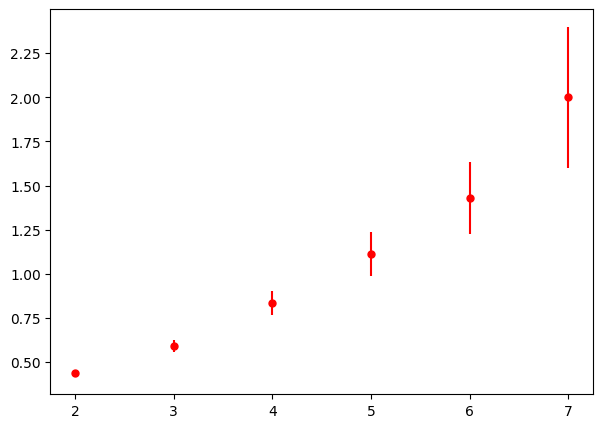

In [ ]:
df = pd.DataFrame(
    {"z": np.array([2.3, 1.7, 1.2, 0.9, 0.7, 0.5]), "m": np.array([2, 3, 4, 5, 6, 7])}
)

yerr = 0.1 / df.z**2

fig = plt.Figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.errorbar(df.m, 1 / df.z, yerr=yerr, marker="o", ms=5, linestyle="", color="red")

fig


In [101]:
df["xi"] = np.sqrt(df.m * df.z * 5461e-10)
df["dxi"] = 1 / 2 * 0.1 / df.z * df.xi
df

pairs = np.vstack((df.xi, df.dxi)).T

for pair in pairs * 2000:
    print(f"{pair[0]:.2f} +" + f"{pair[1]:.2f}")

np.sqrt(((df.dxi * 2000) ** 2).mean())


3.17 +0.07
3.34 +0.10
3.24 +0.13
3.14 +0.17
3.03 +0.22
2.77 +0.28


np.float64(0.17615833224994734)

0.1642 + 0.0013


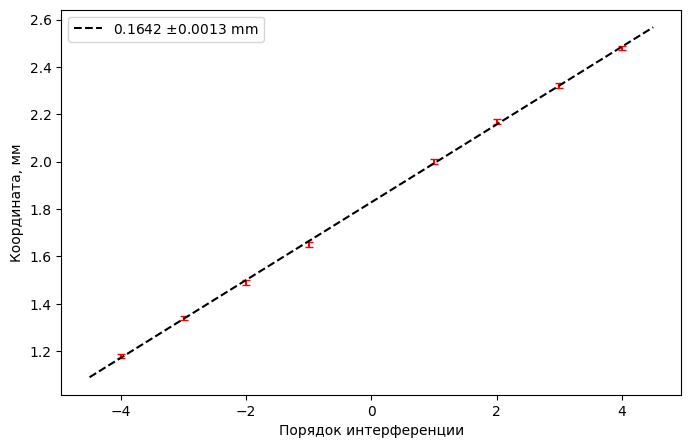

In [104]:
x = np.array((1.18, 1.34, 1.49, 1.65, 2.00, 2.17, 2.32, 2.48))
m = np.array((-4, -3, -2, -1, 1, 2, 3, 4))
yerr = x.copy()
yerr.fill(0.01)
plt.rcParams["figure.figsize"] = (8, 5)
plt.errorbar(m, x, yerr=yerr, marker="o", ms=0.1, capsize=3, linestyle="", color="red")

curve = lambda x, k, b: k * x + b

popt, pcov = curve_fit(curve, m, x)
errs = np.sqrt(np.diag(pcov))
print(f"{popt[0]:.4f} + {np.sqrt(pcov[0][0]):.4f}")
plt.xlabel("Порядок интерференции")
plt.ylabel("Координата, мм")

opt = lambda x: curve(x, *popt)
ls = np.linspace(-4.5, 4.5, 100)

label = f"{popt[0]:.4f} " + r"$\pm$" + f"{np.sqrt(pcov[0][0]):.4f}" + r" mm"
"b"
plt.plot(ls, opt(ls), linestyle="--", color="black", label=label)
plt.legend()

In [92]:
yerr

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])